In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd 
import datetime as dt
import pickle


In [4]:
stock = pd.read_csv('data-computo (1) (1) (1).csv')

In [145]:
stock.head()

,timestamp,stk_minimo,id,stk_proveedor
0,719163,14,1,38
1,719163,49,2,50
2,719163,39,3,39
3,719163,3,4,34
4,719163,14,5,19


In [5]:
stock.columns 
stock['timestamp'] = pd.to_datetime(stock['timestamp'])
stock['timestamp']=stock['timestamp'].map(dt.datetime.toordinal)


In [32]:
X = stock[['stk_proveedor',' id']]

In [33]:
Y = stock[['stk_minimo']]    

In [34]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.6, random_state=5)

In [35]:
X_train

,stk_proveedor,id
502334,33,502335
195925,30,195926
356220,39,356221
507758,50,507759
407673,11,407674
...,...,...
558088,46,558089
124605,10,124606
544751,29,544752
18638,42,18639


In [25]:
Y_train

,stk_minimo
502334,28
195925,28
356220,24
507758,8
407673,2
...,...
558088,10
124605,10
544751,17
18638,39


In [36]:
lrm = LinearRegression()
lrm.fit(X_train, Y_train)

LinearRegression()

In [37]:
from sklearn import metrics

In [38]:
predicciones = lrm.predict(X_test)

In [39]:
predicciones

array([[26.],
       [25.],
       [42.],
       ...,
       [18.],
       [26.],
       [28.]])

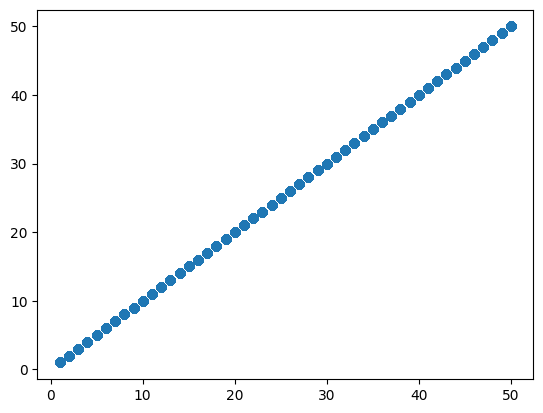

In [40]:
plt.scatter(Y_test, predicciones)

C:\Users\diego\AppData\Local\Temp\ipykernel_14908\1191984370.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(Y_test - predicciones)


<Axes: ylabel='Density'>

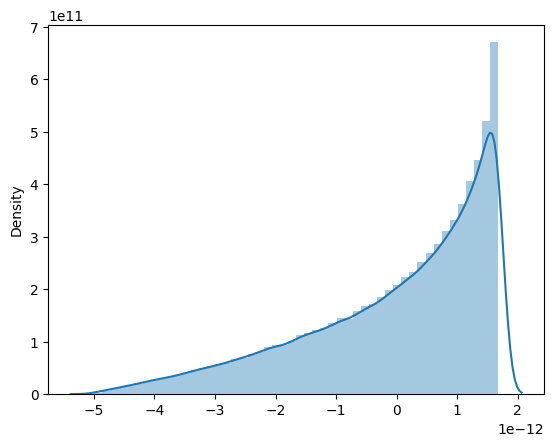

In [205]:
sn.distplot(Y_test - predicciones)

Media del valor absoluto de los errores

In [206]:
metrics.mean_absolute_error(Y_test, predicciones)

1.2405351884501806e-12

c:\Users\diego\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


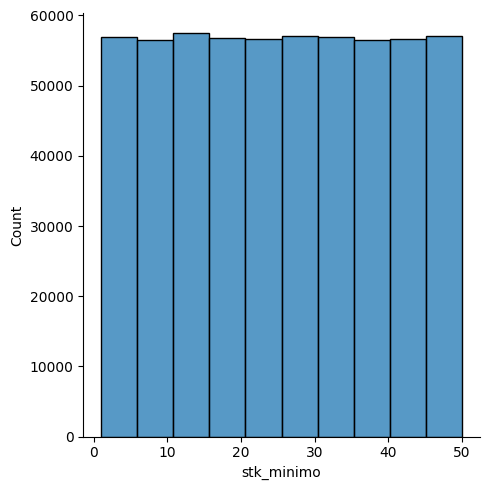

In [208]:
sn.displot(stock['stk_minimo'], kde=False,bins=10)

In [19]:
import pickle